In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("old_dataset.csv")
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
list(df.work_type.value_counts())

[2925, 819, 687, 657, 22]

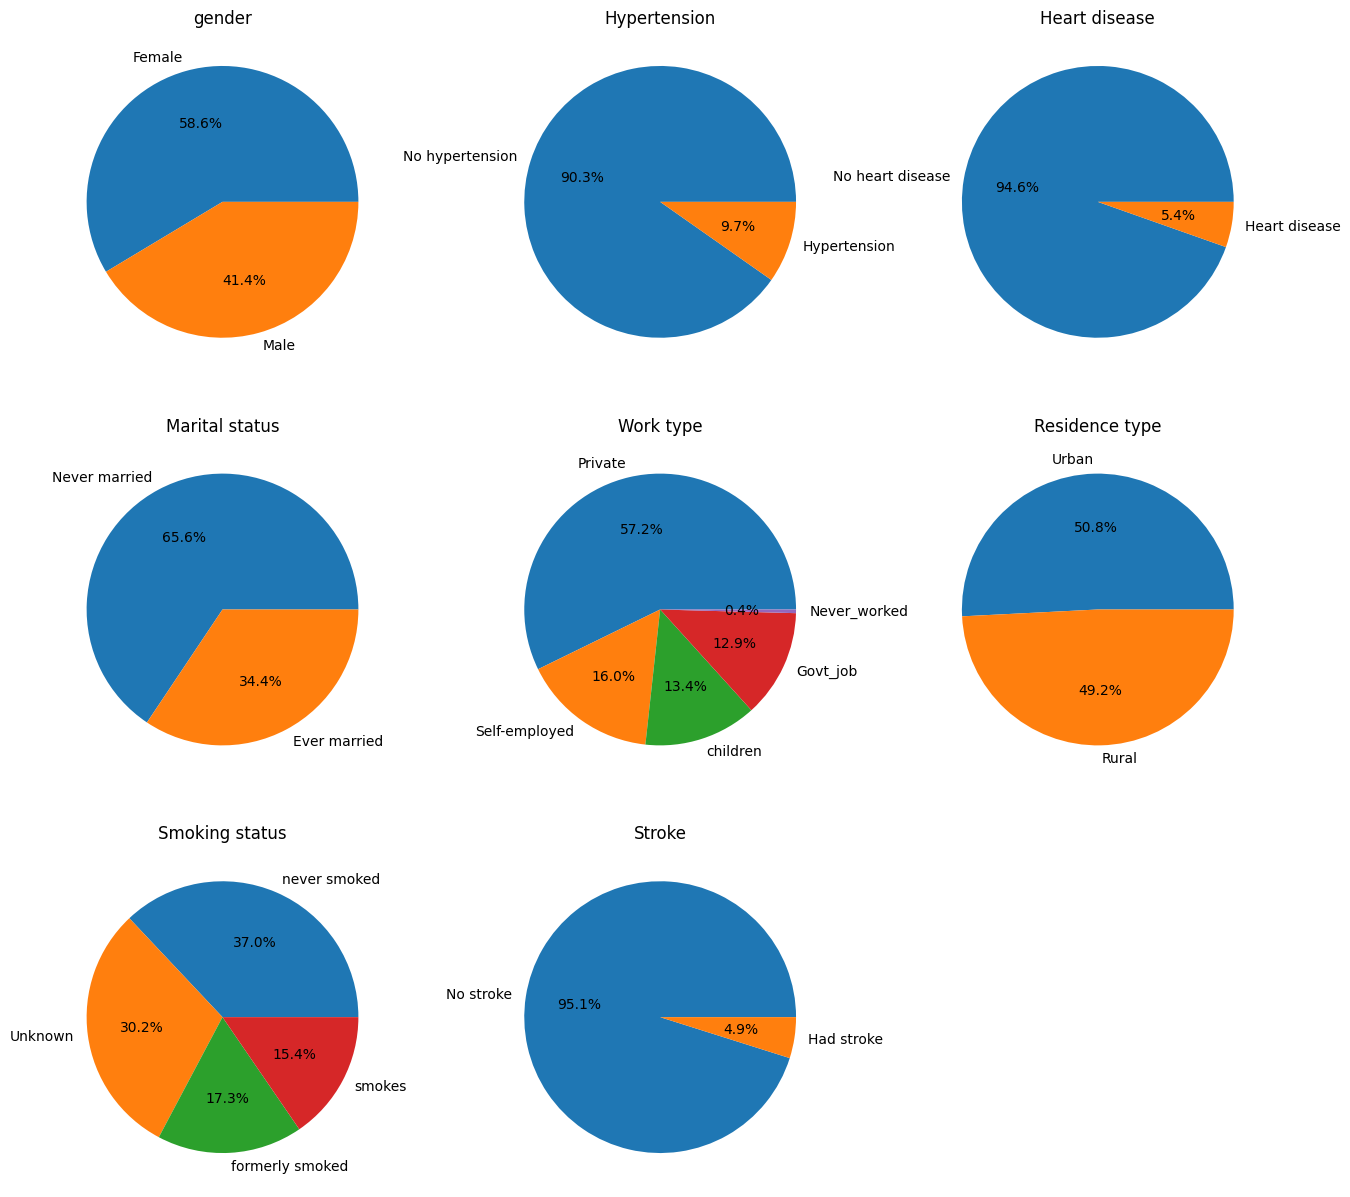

In [5]:
plt.rcParams['figure.figsize'] = [16, 15]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

fcount = df.gender.value_counts()[0]
mcount = df.gender.value_counts()[1]
nohyp = df.hypertension.value_counts()[0]
hyp = df.hypertension.value_counts()[1]
noheart = df.heart_disease.value_counts()[0]
heart = df.heart_disease.value_counts()[1]
nomarried = df.ever_married.value_counts()[0]
married = df.ever_married.value_counts()[1]


fig, ax = plt.subplots(3, 3)
ax[0, 0].pie([fcount, mcount], labels=['Female', 'Male'], autopct='%1.1f%%')
ax[0, 0].set_title("gender")
ax[0, 1].pie([nohyp, hyp], labels=['No hypertension', 'Hypertension'], autopct='%1.1f%%')
ax[0, 1].set_title("Hypertension")
ax[0, 2].pie([noheart, heart], labels=['No heart disease', 'Heart disease'], autopct='%1.1f%%')
ax[0, 2].set_title("Heart disease")
ax[1, 0].pie([nomarried, married], labels=['Never married', 'Ever married'], autopct='%1.1f%%')
ax[1, 0].set_title("Marital status")
ax[1, 1].pie(list(df.work_type.value_counts()), labels=list(df.work_type.value_counts().index), autopct='%1.1f%%')
ax[1, 1].set_title("Work type")
ax[1, 2].pie(list(df.Residence_type.value_counts()), labels=list(df.Residence_type.value_counts().index), autopct='%1.1f%%')
ax[1, 2].set_title("Residence type")
ax[2, 0].pie(list(df.smoking_status.value_counts()), labels=list(df.smoking_status.value_counts().index), autopct='%1.1f%%')
ax[2, 0].set_title("Smoking status")
ax[2, 1].pie(list(df.stroke.value_counts()), labels=["No stroke", "Had stroke"], autopct='%1.1f%%')
ax[2, 1].set_title("Stroke")
fig.delaxes(ax[2, 2])

In [6]:
df.drop(['id', 'hypertension', 'heart_disease', 'stroke'], axis=1).describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [7]:
df.groupby('ever_married').age.mean()

ever_married
No     22.014229
Yes    54.342082
Name: age, dtype: float64

In [8]:
df.stroke.value_counts() / df.stroke.count() * 100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

In [9]:
df3 = df.copy()
df3.stroke = df3.stroke.replace(0, 'No stroke').replace(1, 'Had stroke')
df3.ever_married = df3.ever_married.replace('Yes', 'Ever married').replace('No', 'Never married')


In [10]:
fig = px.sunburst(df3, path=['stroke', 'gender', 'ever_married', 'Residence_type', 'work_type'])
fig.show()

In [30]:
fig = px.sunburst(df3, path=['stroke', 'gender'])
fig.show()

In [31]:
fig = px.sunburst(df, path=['stroke', 'ever_married'])
fig.show()

In [32]:
fig = px.sunburst(df3, path=['stroke', 'work_type'])
fig.show()

In [33]:
fig = px.sunburst(df3, path=['stroke', 'Residence_type'])
fig.show()

In [34]:
fig = px.sunburst(df, path=['gender', 'stroke'])
fig.show()

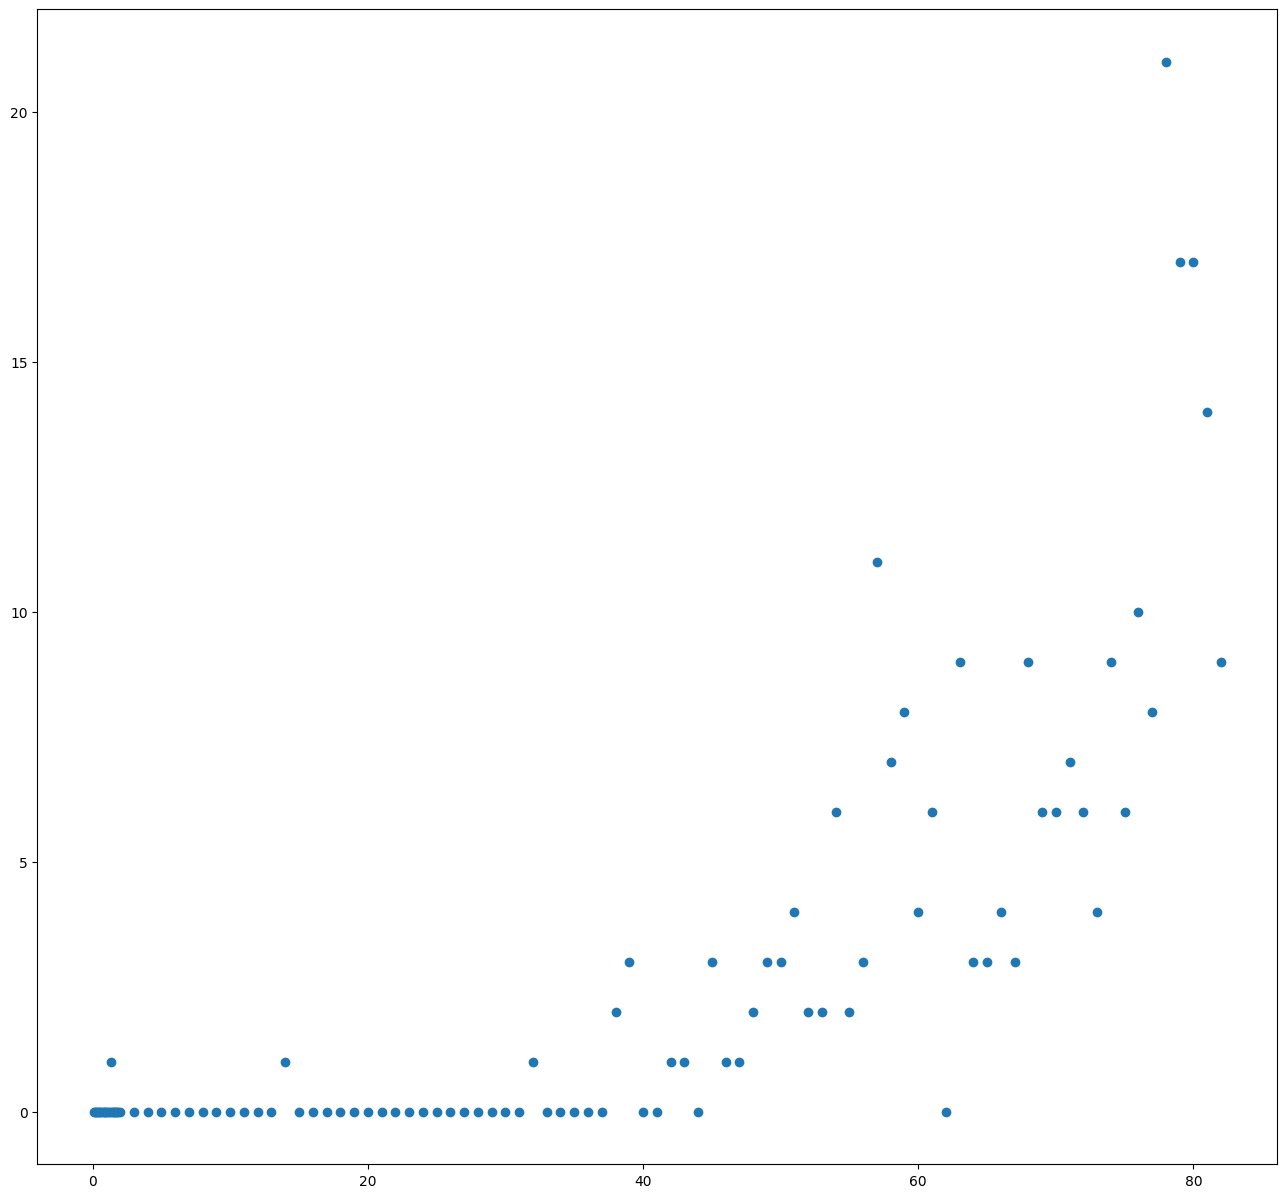

In [35]:
x = df.age.drop_duplicates().sort_values()
y = df.groupby("age").stroke.sum()
plt.scatter(x, y)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [37]:
df = df.dropna()
df = df.drop(['ever_married', 'work_type', 'Residence_type'], axis=1)
# df

In [38]:
y = df.stroke
features = ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = df[features]

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [40]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'smoking_status']


In [41]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=69)
rf_model.fit(OH_X_train, y_train)

/home/Nim/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



RandomForestClassifier(random_state=69)

In [43]:
preds = rf_model.predict(OH_X_valid)

/home/Nim/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [44]:
mean_squared_error(y_valid, preds)

0.043973941368078175

In [45]:
rf_model.score(OH_X_valid, y_valid)

/home/Nim/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.9560260586319218

In [46]:
for p, a in zip(preds, y_valid.values):
    print(p,"\t\t", a)

0 		 0
0 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
1 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 1
0 		 0
0 		 0

In [50]:
unique, counts = np.unique(preds, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_valid, return_counts=True)
print(dict(zip(unique, counts)))


{0: 1227, 1: 1}
{0: 1175, 1: 53}
